In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

now, let's load the datasets:


In [2]:
df_inventory = pd.read_parquet('local_data/inventory.parquet', engine='pyarrow')
df_abandoned_carts = pd.read_parquet('local_data/abandoned_carts.parquet', engine='pyarrow')
df_orders = pd.read_parquet('local_data/orders.parquet', engine='pyarrow')
df_regulars = pd.read_parquet('local_data/regulars.parquet', engine='pyarrow')
df_users = pd.read_parquet('local_data/users.parquet', engine='pyarrow')

let's now check what products are the most purchased and which ones are the most abandoned:

       product_id  number_of_orders  purchase_probability  \
0  33615294398596              88.0              0.010031   
1  33667174301828              13.0              0.001482   
2  33667174334596              15.0              0.001710   
3  33667174465668              65.0              0.007409   
4  33667174498436              78.0              0.008891   

   number_of_abandoned  abandon_probability  
0                 18.0             0.003299  
1                  2.0             0.000367  
2                  4.0             0.000733  
3                  9.0             0.001649  
4                  6.0             0.001100  
Guardando el gráfico...
Gráfico guardado.


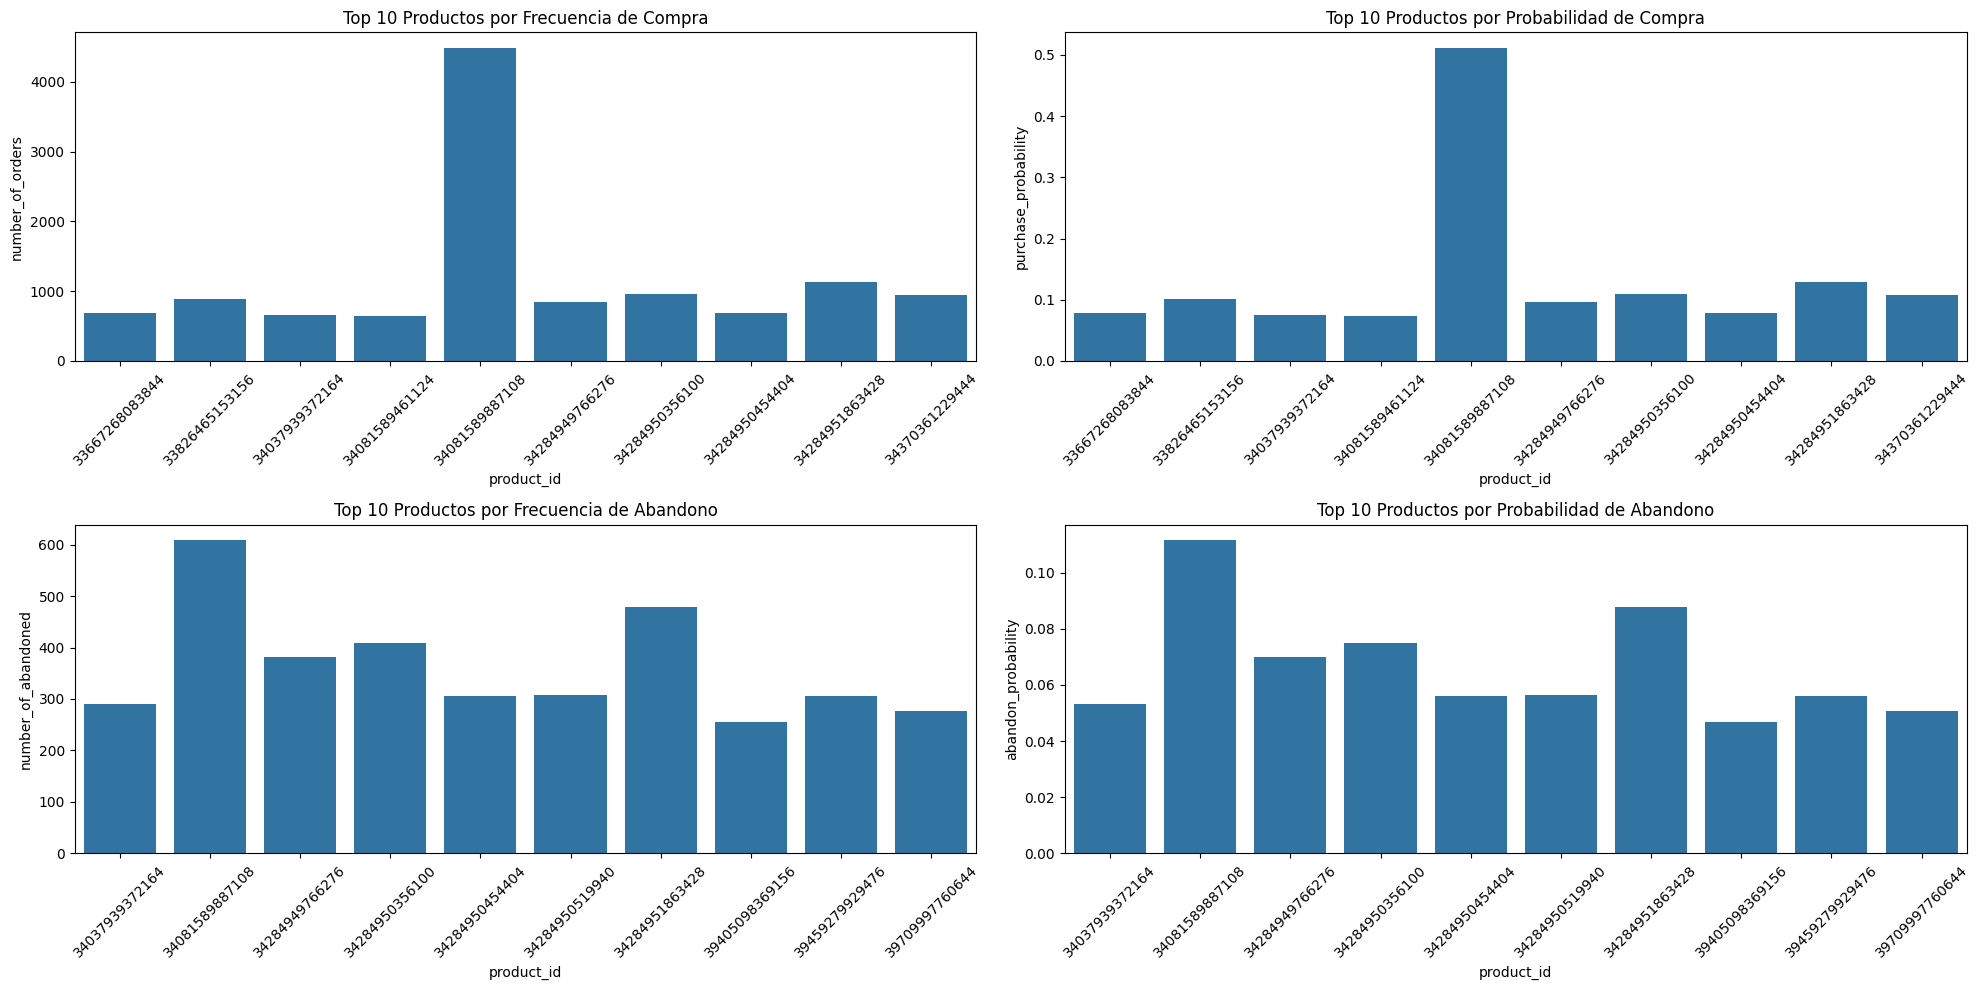

,product_id,number_of_orders,purchase_probability,number_of_abandoned,abandon_probability
0,33615294398596,88.0,0.010031,18.0,0.003299
1,33667174301828,13.0,0.001482,2.0,0.000367
2,33667174334596,15.0,0.001710,4.0,0.000733
3,33667174465668,65.0,0.007409,9.0,0.001649
4,33667174498436,78.0,0.008891,6.0,0.001100
...,...,...,...,...,...
1497,40091799617668,0.0,0.000000,1.0,0.000183
1498,40091799945348,1.0,0.000114,4.0,0.000733
1499,40091799978116,10.0,0.001140,6.0,0.001100
1500,40155145044100,2.0,0.000228,4.0,0.000733


In [8]:
def combinar_datasets_totales(): 
    # Paso 1: Crear DataFrame de pedidos
    exploded_items = df_orders['ordered_items'].explode()  
    item_counts = exploded_items.value_counts()
    item_counts_df_orders = item_counts.reset_index()
    item_counts_df_orders.columns = ['product_id', 'number_of_orders']
    total_orders = len(df_orders)
    item_counts_df_orders['purchase_probability'] = item_counts_df_orders['number_of_orders'] / total_orders
    #print("primeros cinco df orders: ", item_counts_df_orders.head())

    # Paso 2: Crear DataFrame de carritos abandonados
    exploded_items_abandoned = df_abandoned_carts['variant_id'].explode()
    item_counts_abandoned = exploded_items_abandoned.value_counts()
    item_counts_df_abandoned = item_counts_abandoned.reset_index()
    item_counts_df_abandoned.columns = ['product_id', 'number_of_abandoned']
    total_abandoned_carts = len(df_abandoned_carts)
    item_counts_df_abandoned['abandon_probability'] = item_counts_df_abandoned['number_of_abandoned'] / total_abandoned_carts
    #print("primeros cinco df abandoned: ", item_counts_df_abandoned.head())

    # Paso 3: Filtrar para incluir solo productos en inventario
    df_orders_inventory = item_counts_df_orders[item_counts_df_orders["product_id"].isin(df_inventory["variant_id"])]
    df_abandoned_inventory = item_counts_df_abandoned[item_counts_df_abandoned["product_id"].isin(df_inventory["variant_id"])]

    # Paso 4: Combinar los DataFrames
    df_combined = df_orders_inventory.merge(df_abandoned_inventory, on="product_id", how="outer")

    # Rellenar valores NaN con 0, ya que algunos productos pueden no estar en ambos DataFrames
    df_combined.fillna(0, inplace=True)
    print(df_combined.head())
    plt.figure(figsize=(20, 10))

    # Top 10 productos por frecuencia de compra
    plt.subplot(2, 2, 1)
    sns.barplot(x='product_id', y='number_of_orders', data=df_combined.sort_values('number_of_orders', ascending=False).head(10))
    plt.title('Top 10 Productos por Frecuencia de Compra')
    plt.xticks(rotation=45)

    # Top 10 productos por probabilidad de compra
    plt.subplot(2, 2, 2)
    sns.barplot(x='product_id', y='purchase_probability', data=df_combined.sort_values('purchase_probability', ascending=False).head(10))
    plt.title('Top 10 Productos por Probabilidad de Compra')
    plt.xticks(rotation=45)

    # Top 10 productos por frecuencia de abandono
    plt.subplot(2, 2, 3)
    sns.barplot(x='product_id', y='number_of_abandoned', data=df_combined.sort_values('number_of_abandoned', ascending=False).head(10))
    plt.title('Top 10 Productos por Frecuencia de Abandono')
    plt.xticks(rotation=45)

    # Top 10 productos por probabilidad de abandono
    plt.subplot(2, 2, 4)
    sns.barplot(x='product_id', y='abandon_probability', data=df_combined.sort_values('abandon_probability', ascending=False).head(10))
    plt.title('Top 10 Productos por Probabilidad de Abandono')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    print("Guardando el gráfico...")
    plt.savefig('/home/edu/zrive-ds-1/zrive-ds/src/module_2/graphs/graph_1.png')
    print("Gráfico guardado.")

    plt.show()
    
    plt.close()
    return df_combined
    

combinar_datasets_totales()